# Adding a plot

In this exercise we will again return to the treatment centre model.  We will enhance the app by adding in a simple plot.

# Imports

In [8]:
import plotly.express as px

from treat_sim.model import Scenario, multiple_replications

## Exercise 1

Create a new python file called `app_with_plot.py` and copy as paste in the code from `app_with_sidebar.py` shown below

```python
'''
Script to complete a basic run of the model and display a table of
results in a streamlit app.

The model is imported from a pypi package 'treat_sim'

Full documentation and source code for `treat_sim` is available as 
* Jupyter Book: https://tommonks.github.io/treatment-centre-sim/
* github: https://github.com/TomMonks/treatment-centre-sim

A conda environment has been provided locally,but the model can be pip installed
`pip install treat_sim==1.0.0`
'''
from treat_sim.model import Scenario, multiple_replications
import streamlit as st

INTRO_FILE = 'resources/overview.md'

def read_file_contents(file_name):
    ''''
    Read the contents of a file.

    Params:
    ------
    file_name: str
        Path to file.

    Returns:
    -------
    str
    '''
    with open(file_name) as f:
        return f.read()

# give the page a title
st.title('Treatment Centre Simulation Model')

# show the introductory markdown
st.markdown(read_file_contents(INTRO_FILE))

################################################################################
# MODIFICATION: create a sidebar for sliders
with st.sidebar:
    n_triage = st.slider('Triage bays', 1, 5, 1)
    n_exam = st.slider('Exam rooms', 1, 5, 3)
    n_cubicles_1 = st.slider('Non-Trauma Treatment cubicles', 1, 5, 1, 
                             help='Set the number of non trauma pathway '
                             + 'treatment cubicles')

    # examination mean
    exam_mean = st.slider('Mean examination time', 10.0, 45.0, 
                           16.0, 1.0)

    # runs
    replications = st.slider('No. replications', 1, 50, 10)
################################################################################

# Setup scenario using supplied variables
args = Scenario(n_triage=n_triage, n_exam=n_exam, n_cubicles_1=n_cubicles_1,
                exam_mean=exam_mean)

# Only execute model if a streamlit button is pressed.
if st.button('Simulate treatment centre'):

    # in this example run a single replication of the model.
    with st.spinner('Simulating the treatment centre...'):
        results = multiple_replications(args, n_reps=replications)

    st.success('Done!')

    # display results using st.table (or st.dataframe)
    st.table(results.mean().round(1))

```

## Exercise 2

The code below creates a`pandas.DataFrame` called `results` in the same format as code in the `app_with_plot.py`.

Each row in the `DataFrame` is a replication and each column is a performance measure.  You can quickly run the code and view the format.

**Task:**

* Create a function called `create_hist()`. The function should accept `results` and create a histogram of the results of a performance measure of your choice.  For example, `03a_examination_wait`. 
* The function should return a `plotly` figure object to the calling code. It is recommended you use the `fig` naming convention.
* Include a violin plot above the histogram using plotly express.

**Hints**:
* It is recommended that you complete this exercise in the Jupyter notebook before modifying `app_with_plot.py`
* At the top of this notebook we have imported `plotly.express`
* To have a useful histogram you may want to run more than 10 replications. e.g. 50 to 100.
* Jupyter notebooks will render the histogram with calling `fig.show()`, just leave the last line of code in a cell as `fig`.  In a python module you will need to call `fig.show()`

In [12]:
default_scenario = Scenario()
results = multiple_replications(default_scenario, n_reps=50)
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   00_arrivals                     50 non-null     float64
 1   01a_triage_wait                 50 non-null     float64
 2   01b_triage_util                 50 non-null     float64
 3   02a_registration_wait           50 non-null     float64
 4   02b_registration_util           50 non-null     float64
 5   03a_examination_wait            50 non-null     float64
 6   03b_examination_util            50 non-null     float64
 7   04a_treatment_wait(non_trauma)  50 non-null     float64
 8   04b_treatment_util(non_trauma)  50 non-null     float64
 9   05_total_time(non-trauma)       50 non-null     float64
 10  06a_trauma_wait                 50 non-null     float64
 11  06b_trauma_util                 50 non-null     float64
 12  07a_treatment_wait(trauma)      50 non

In [13]:
def create_hist(results, column, value_label, marginal='box'):
    '''
    Create and return a plotly express histogram of
    the results column
    
    Params:
    -------
    results: pd.DataFrame
        Rows = replications, columns = KPIs
        
    column: str
        Name of column in results to use
        
    value_label: str
        X-axis label
        
    marginal: str, optional (default='box')
        An additional plot to render above the histogram
        options to try: box, violin, rug
        
    Returns:
    ------
    plotly.figure
        
    '''
    fig = px.histogram(results[column], labels={'value':value_label},
                       marginal=marginal)
    # hide legend
    fig.update(layout_showlegend=False)
    
    return fig

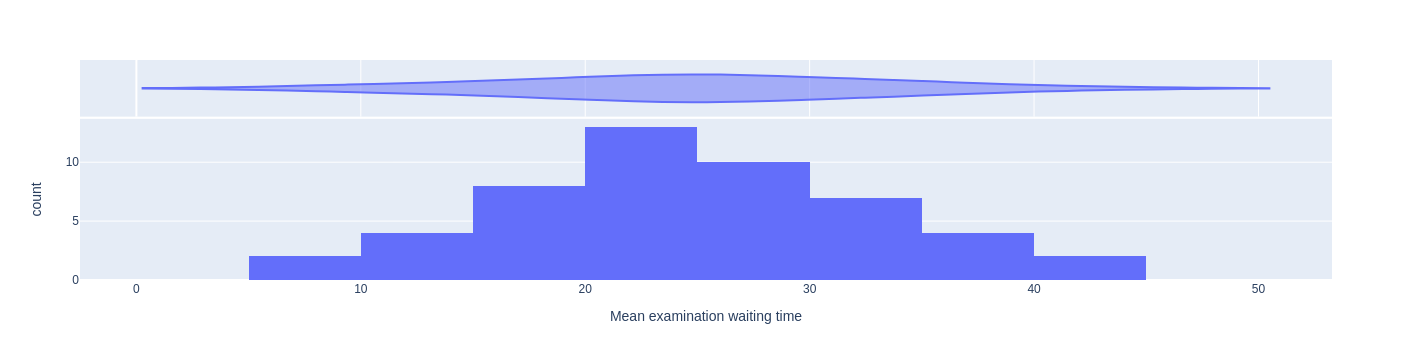

In [16]:
fig = create_hist(results, column='03a_examination_wait', 
                  value_label='Mean examination waiting time',
                  marginal='violin')

fig

## Exercise 3:

Modify `app_with_plot.py` to use `create_hist()` and display histogram of your chosen KPI to a user.

**Hints:**

* Don't forget to import `plotly.express`


An example solution:

```python
"""
Script to complete a basic run of the model and display a table of
results and a plotly histogram in a streamlit app.

The model is imported from a pypi package 'treat_sim'

Full documentation and source code for `treat_sim` is available as 
* Jupyter Book: https://tommonks.github.io/treatment-centre-sim/
* github: https://github.com/TomMonks/treatment-centre-sim

A conda environment has been provided locally,but the model can be pip installed
`pip install treat_sim==1.0.0`
"""
from treat_sim.model import Scenario, multiple_replications
import streamlit as st
import plotly.express as px

INTRO_FILE = 'resources/overview.md'

def read_file_contents(file_name):
    ''''
    Read the contents of a file.

    Params:
    ------
    file_name: str
        Path to file.

    Returns:
    -------
    str
    '''
    with open(file_name) as f:
        return f.read()

##################################################################
# MODIFICATION: Function to create plotly histogram
def create_hist(results, column, value_label, marginal='box'):
    '''
    Create and return a plotly express histogram of
    the results column
    
    Params:
    -------
    results: pd.DataFrame
        Rows = replications, columns = KPIs
        
    column: str
        Name of column in results to use
        
    value_label: str
        X-axis label
        
    marginal: str, optional (default='box')
        An additional plot to render above the histogram
        options to try: box, violin, rug
        
    Returns:
    ------
    plotly.figure
        
    '''
    fig = px.histogram(results[column], labels={'value':value_label},
                       marginal=marginal)
    # hide legend
    fig.update(layout_showlegend=False)
    
    return fig
#####################################################################

# give the page a title
st.title('Treatment Centre Simulation Model')

# show the introductory markdown
st.markdown(read_file_contents(INTRO_FILE))

# create a sidebar for sliders
with st.sidebar:
    n_triage = st.slider('Triage bays', 1, 5, 1)
    n_exam = st.slider('Exam rooms', 1, 5, 3)
    n_cubicles_1 = st.slider('Non-Trauma Treatment cubicles', 1, 5, 1, 
                             help='Set the number of non trauma pathway '
                             + 'treatment cubicles')

    # examination mean
    exam_mean = st.slider('Mean examination time', 10.0, 45.0, 
                           16.0, 1.0)

    # runs
    replications = st.slider('No. replications', 1, 50, 10)

# Setup scenario using supplied variables
args = Scenario(n_triage=n_triage, n_exam=n_exam, n_cubicles_1=n_cubicles_1,
                exam_mean=exam_mean)

# Only execute model if a streamlit button is pressed.
if st.button('Simulate treatment centre'):

    # in this example run a single replication of the model.
    with st.spinner('Simulating the treatment centre...'):
        results = multiple_replications(args, n_reps=replications)

    st.success('Done!')

    # display results using st.table (or st.dataframe)
    st.table(results.mean().round(1))

    # ######################################################################
    # MODIFICATION: Show results of a KPI as histogram
    fig = create_hist(results, column='03a_examination_wait', 
                  value_label='Mean examination waiting time',
                  marginal='violin')

    st.plotly_chart(fig, use_container_width=True)
    ########################################################################
```